# **PROYECTO DE GRADO - MAESTRIA EN CIENCIA DE DATOS**
## Segmentación de profesionales de la salud del sector farmacéutico
### Santiago Reyes Zabaleta


## Comparativa Modelos
-------------------------------------------------------------------------------------


Resumen de Puntajes de Silhouette:
  Category          Model  Silhouette Score
0  Benigna         DBSCAN          0.476086
1  Benigna  Agglomerative          0.555024
2  Benigna            GMM          0.149498
3  Benigna         KMeans          0.576555
4  Benigna   Hierarchical          0.555024
5  Maligna         DBSCAN          0.098834
6  Maligna  Agglomerative          0.400189
7  Maligna            GMM          0.387416
8  Maligna         KMeans          0.481543
9  Maligna   Hierarchical          0.400189

Mejor Modelo:
Category             Benigna
Model                 KMeans
Silhouette Score    0.576555
Name: 3, dtype: object

Resumen Completo de Puntajes por Modelo y Tipo de Consulta:
Category        Benigna   Maligna
Model                            
Agglomerative  0.555024  0.400189
DBSCAN         0.476086  0.098834
GMM            0.149498  0.387416
Hierarchical   0.555024  0.400189
KMeans         0.576555  0.481543


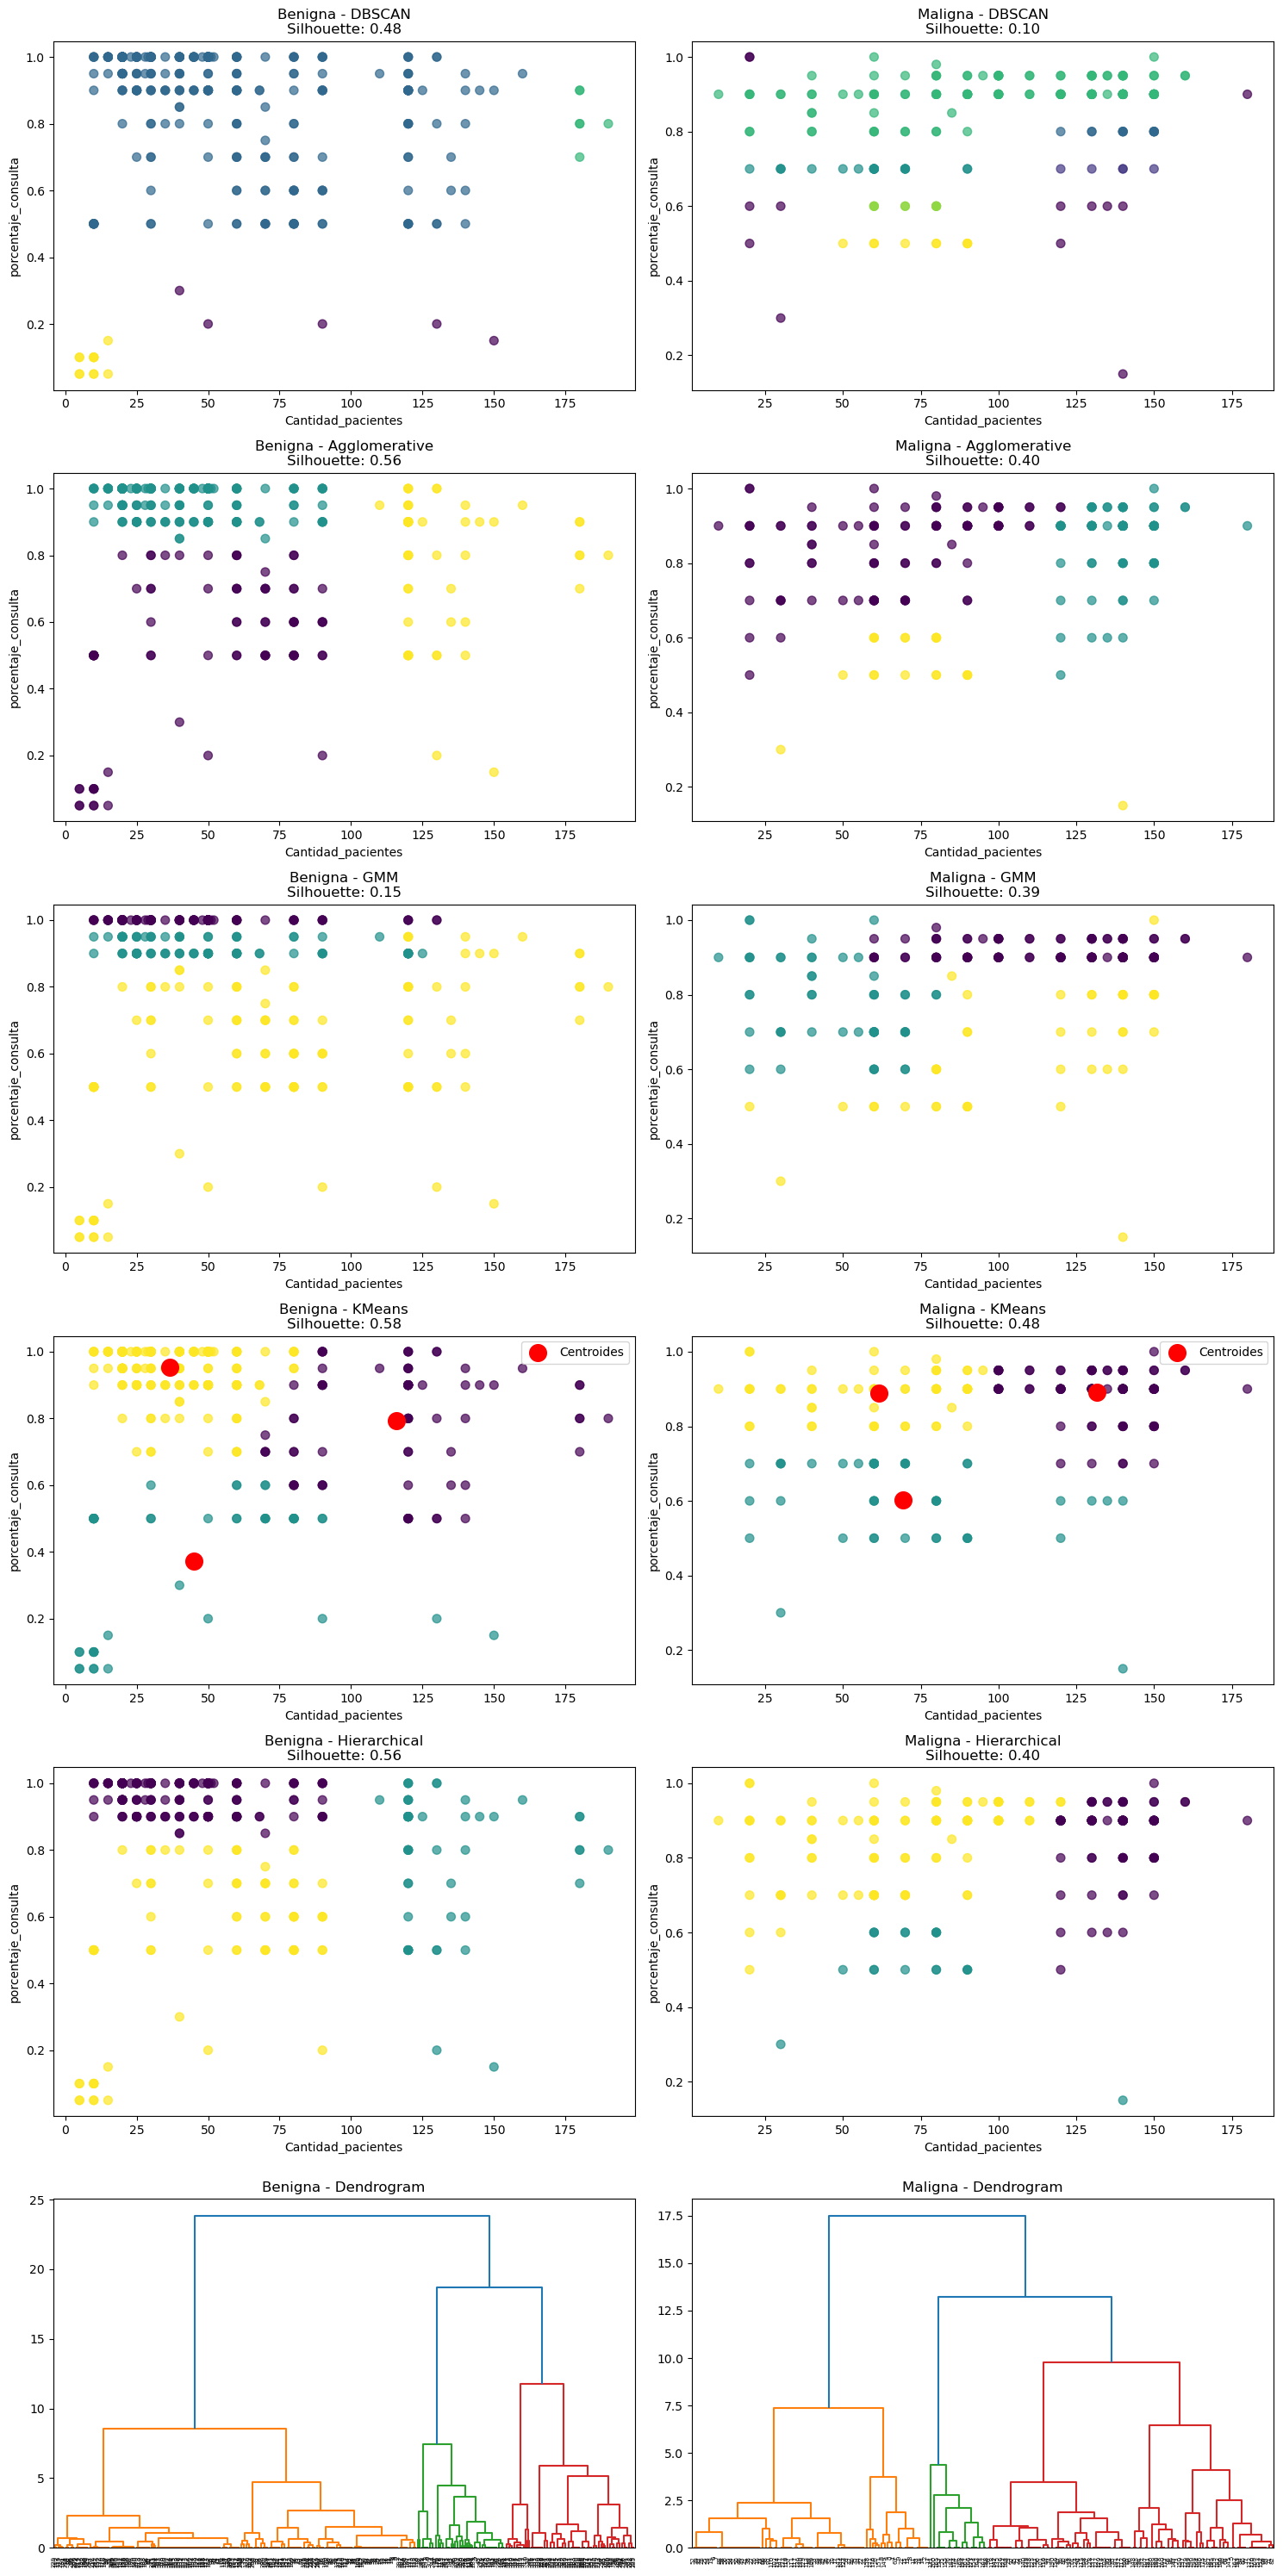

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Cargar datos
data = pd.read_csv('data_cleaned.csv')

# Dividir los datos en "benigna" y "maligna"
benigna_data = data[data['tipo_consulta'] == 'benigna']
maligna_data = data[data['tipo_consulta'] == 'maligna']

# Función para calcular Silhouette
def calculate_silhouette_score(features, clusters):
    if len(set(clusters)) > 1:
        return silhouette_score(features, clusters)
    else:
        return None

# Función para escalar datos
def scale_features(subset_data):
    scaler = StandardScaler()
    features = subset_data[['Cantidad_pacientes', 'porcentaje_consulta']].values
    scaled_features = scaler.fit_transform(features)
    return features, scaled_features, scaler

# Funciones de clustering
def apply_dbscan(scaled_features, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(scaled_features)
    return clusters


def apply_agglomerative_clustering(scaled_features, n_clusters=3):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = agglomerative.fit_predict(scaled_features)
    return clusters


def apply_gaussian_mixture(scaled_features, n_components=3):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    clusters = gmm.fit_predict(scaled_features)
    return clusters


def apply_kmeans(scaled_features, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    return clusters, kmeans.cluster_centers_


def apply_hierarchical(scaled_features, n_clusters=3, method='ward'):
    linkage_matrix = linkage(scaled_features, method=method)
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    return clusters, linkage_matrix

# Crear un diccionario para almacenar resultados
silhouette_scores = {'Benigna': {}, 'Maligna': {}}

# Procesar para "benigna"
benigna_features, benigna_scaled, benigna_scaler = scale_features(benigna_data)
benigna_clusters_dbscan = apply_dbscan(benigna_scaled)
benigna_clusters_agg = apply_agglomerative_clustering(benigna_scaled)
benigna_clusters_gmm = apply_gaussian_mixture(benigna_scaled)
benigna_clusters_kmeans, benigna_kmeans_centers_scaled = apply_kmeans(benigna_scaled)
benigna_kmeans_centers = benigna_scaler.inverse_transform(benigna_kmeans_centers_scaled)
benigna_clusters_hierarchical, benigna_linkage_matrix = apply_hierarchical(benigna_scaled)

# Calcular Silhouette para "benigna"
silhouette_scores['Benigna']['DBSCAN'] = calculate_silhouette_score(benigna_scaled, benigna_clusters_dbscan)
silhouette_scores['Benigna']['Agglomerative'] = calculate_silhouette_score(benigna_scaled, benigna_clusters_agg)
silhouette_scores['Benigna']['GMM'] = calculate_silhouette_score(benigna_scaled, benigna_clusters_gmm)
silhouette_scores['Benigna']['KMeans'] = calculate_silhouette_score(benigna_scaled, benigna_clusters_kmeans)
silhouette_scores['Benigna']['Hierarchical'] = calculate_silhouette_score(benigna_scaled, benigna_clusters_hierarchical)

# Procesar para "maligna"
maligna_features, maligna_scaled, maligna_scaler = scale_features(maligna_data)
maligna_clusters_dbscan = apply_dbscan(maligna_scaled)
maligna_clusters_agg = apply_agglomerative_clustering(maligna_scaled)
maligna_clusters_gmm = apply_gaussian_mixture(maligna_scaled)
maligna_clusters_kmeans, maligna_kmeans_centers_scaled = apply_kmeans(maligna_scaled)
maligna_kmeans_centers = maligna_scaler.inverse_transform(maligna_kmeans_centers_scaled)
maligna_clusters_hierarchical, maligna_linkage_matrix = apply_hierarchical(maligna_scaled)

# Calcular Silhouette para "maligna"
silhouette_scores['Maligna']['DBSCAN'] = calculate_silhouette_score(maligna_scaled, maligna_clusters_dbscan)
silhouette_scores['Maligna']['Agglomerative'] = calculate_silhouette_score(maligna_scaled, maligna_clusters_agg)
silhouette_scores['Maligna']['GMM'] = calculate_silhouette_score(maligna_scaled, maligna_clusters_gmm)
silhouette_scores['Maligna']['KMeans'] = calculate_silhouette_score(maligna_scaled, maligna_clusters_kmeans)
silhouette_scores['Maligna']['Hierarchical'] = calculate_silhouette_score(maligna_scaled, maligna_clusters_hierarchical)

# Crear tabla resumen de resultados
results_summary = []
for category, models in silhouette_scores.items():
    for model, score in models.items():
        results_summary.append({'Category': category, 'Model': model, 'Silhouette Score': score})

results_df = pd.DataFrame(results_summary)

# Identificar el mejor modelo
top_model = results_df.loc[results_df['Silhouette Score'].idxmax()]

# Mostrar tabla resumen y el mejor modelo
print("\nResumen de Puntajes de Silhouette:")
print(results_df)
print("\nMejor Modelo:")
print(top_model)

# Crear una tabla para visualización
results_table = pd.pivot_table(results_df, values='Silhouette Score', index='Model', columns='Category', aggfunc='mean')
print("\nResumen Completo de Puntajes por Modelo y Tipo de Consulta:")
print(results_table)

# Graficar los resultados en una figura organizada
fig, axes = plt.subplots(6, 2, figsize=(15, 30))

def plot_clustering(ax, features, clusters, title, centers=None, silhouette_score=None):
    scatter = ax.scatter(features[:, 0], features[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
    ax.set_title(f"{title}\nSilhouette: {silhouette_score:.2f}")
    ax.set_xlabel('Cantidad_pacientes')
    ax.set_ylabel('porcentaje_consulta')
    if centers is not None:
        ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, label='Centroides')
        ax.legend()
    return scatter

# Graficar para "benigna"
plot_clustering(axes[0, 0], benigna_features, benigna_clusters_dbscan, "Benigna - DBSCAN", silhouette_score=silhouette_scores['Benigna']['DBSCAN'])
plot_clustering(axes[1, 0], benigna_features, benigna_clusters_agg, "Benigna - Agglomerative", silhouette_score=silhouette_scores['Benigna']['Agglomerative'])
plot_clustering(axes[2, 0], benigna_features, benigna_clusters_gmm, "Benigna - GMM", silhouette_score=silhouette_scores['Benigna']['GMM'])
plot_clustering(axes[3, 0], benigna_features, benigna_clusters_kmeans, "Benigna - KMeans", centers=benigna_kmeans_centers, silhouette_score=silhouette_scores['Benigna']['KMeans'])
plot_clustering(axes[4, 0], benigna_features, benigna_clusters_hierarchical, "Benigna - Hierarchical", silhouette_score=silhouette_scores['Benigna']['Hierarchical'])
axes[5, 0].set_title("Benigna - Dendrogram")
dendrogram(benigna_linkage_matrix, ax=axes[5, 0])

# Graficar para "maligna"
plot_clustering(axes[0, 1], maligna_features, maligna_clusters_dbscan, "Maligna - DBSCAN", silhouette_score=silhouette_scores['Maligna']['DBSCAN'])
plot_clustering(axes[1, 1], maligna_features, maligna_clusters_agg, "Maligna - Agglomerative", silhouette_score=silhouette_scores['Maligna']['Agglomerative'])
plot_clustering(axes[2, 1], maligna_features, maligna_clusters_gmm, "Maligna - GMM", silhouette_score=silhouette_scores['Maligna']['GMM'])
plot_clustering(axes[3, 1], maligna_features, maligna_clusters_kmeans, "Maligna - KMeans", centers=maligna_kmeans_centers, silhouette_score=silhouette_scores['Maligna']['KMeans'])
plot_clustering(axes[4, 1], maligna_features, maligna_clusters_hierarchical, "Maligna - Hierarchical", silhouette_score=silhouette_scores['Maligna']['Hierarchical'])
axes[5, 1].set_title("Maligna - Dendrogram")
dendrogram(maligna_linkage_matrix, ax=axes[5, 1])

plt.tight_layout()
plt.show()

